In [1]:
# Importing the reqiured libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os.path
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
# We have used HR-Employee-Attrition dataset from Kaggle for implementation of our project
dir = 'Dataset/HR-Employee-Attrition.csv'
dataset = pd.read_csv(dir)

In [3]:
# Exploring the Dataset
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
dataset.shape
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Checking all the categorical features in the dataset
# We can see that here, there are 3 departments of the company, which will play important role in deciding attrition 
# of employee
dataset.groupby('Department')['Department'].agg('count')

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64

In [6]:
# Checking if there are null values
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Checking the BusinessTravel feature
dataset.groupby('BusinessTravel')['BusinessTravel'].agg('count')

BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64

In [8]:
# Exploring the EducationField feature of employee, as you see there are 6 different categorical values.
dataset.groupby('EducationField')['EducationField'].agg('count')

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: EducationField, dtype: int64

In [9]:
# Grouping the employees by age
dataset.groupby('Age')['Age'].agg('count')

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: Age, dtype: int64

In [10]:
# Dropping the unwanted columns that doesn't nurture in employee attrition prediction 
dataset = dataset.drop(['EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 
                        'Over18', 'StockOptionLevel'], axis='columns')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,3,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,2,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Male,2,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,3,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Male,3,...,3,4,80,6,3,3,2,2,2,2


<AxesSubplot:xlabel='Attrition', ylabel='count'>

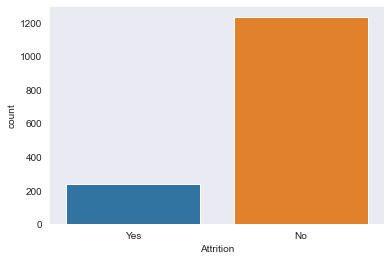

In [11]:
# Visualizing the data
# Comparing the Attrition of employees
sns.set_style('dark')
sns.countplot(x='Attrition', data = dataset)

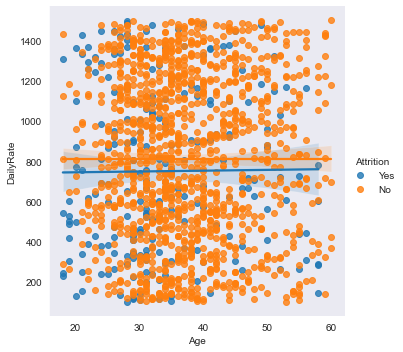

In [12]:
# Plotting the 'Attrition' with 'Age' feature
sns.lmplot(x = 'Age',
           y = 'DailyRate',
           hue = 'Attrition',
           data = dataset)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

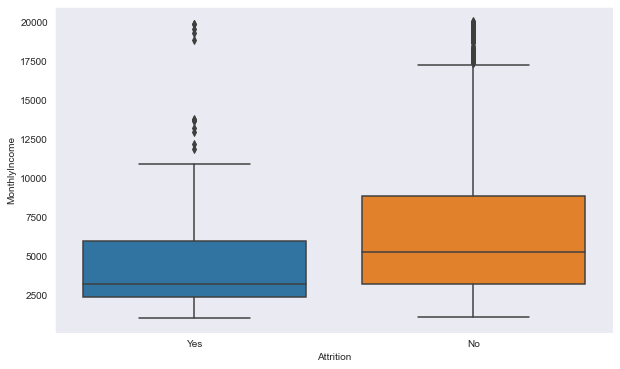

In [13]:
# Plotting the 'Attrition' with 'MonthlyIncome' of employee
# You  can see here if the monthlyincome is less the employee mostly tends to leave the company
plt.figure(figsize = (10, 6))
sns.boxplot(y = 'MonthlyIncome',
            x = 'Attrition',
            data = dataset)

In [14]:
gender_dict = dataset["Gender"].value_counts()
print(gender_dict)

Male      882
Female    588
Name: Gender, dtype: int64


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

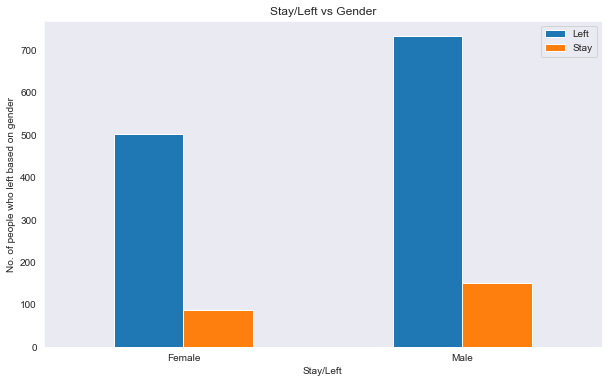

In [15]:
# Plotting the crosstab of 'Attrition' v/s 'Gender' to see attrition rate w.r.t. to gender
pd.crosstab(dataset['Gender'],dataset['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [16]:
# Checking the 'MaritalStatus' of employees
# 3 types of marital status are found "Married", "Single", "Divorced"
Marital_dict = dataset["MaritalStatus"].value_counts()
print(Marital_dict)

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [17]:
# Checking to which 'Department' does the employee belong
promoted_dict = dataset['Department'].value_counts
print(promoted_dict)

<bound method IndexOpsMixin.value_counts of 0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object>


<AxesSubplot:title={'center':'Department in organization'}>

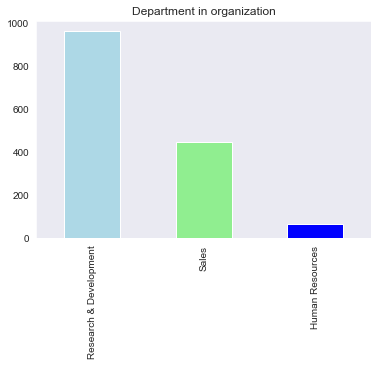

In [18]:
dataset['Department'].value_counts().plot(kind='bar',color=['lightblue','lightgreen','blue'],title="Department in organization")

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

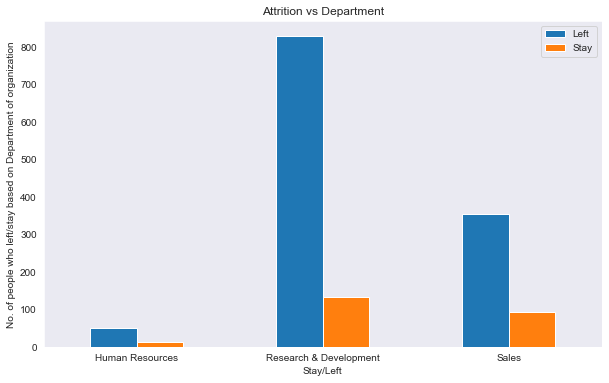

In [19]:
# Crosstab for Department and Attrition
pd.crosstab(dataset['Department'],dataset['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Department")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on Department of organization")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [20]:
# Checking the JobRole of employees in the company
jobrole_dict = dataset['JobRole'].value_counts()
print(jobrole_dict)

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

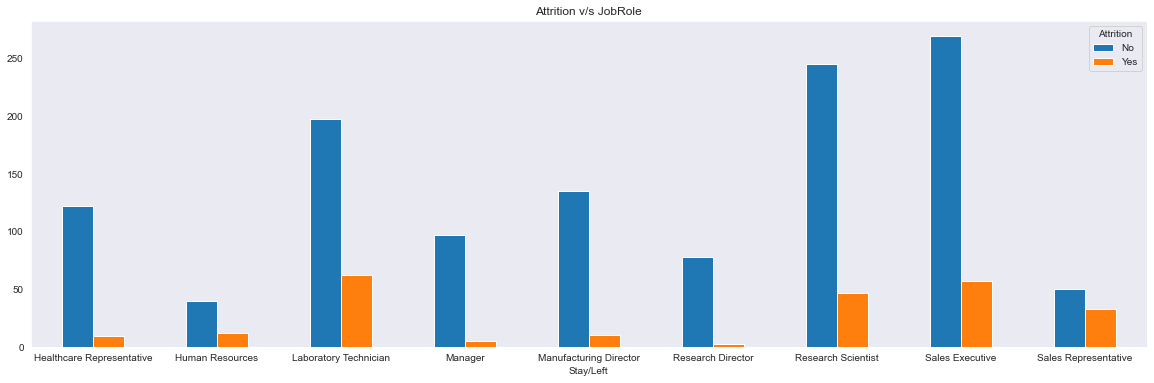

In [21]:
# Applying the crossteab for JobRole and Attrition for checking attrition for each jobrole 
pd.crosstab(dataset['JobRole'],dataset['Attrition']).plot(kind='bar',figsize=(20,6))
plt.title('Attrition v/s JobRole')
plt.xlabel('Stay/Left')
plt.xticks(rotation=0)  

In [22]:
# In the dataset, JobSatisfaction index is given as, '1','2','3' and '4' on the basis of satisfaction 
jobsatisfaction_dict = dataset['JobSatisfaction'].value_counts()
print(jobsatisfaction_dict)

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

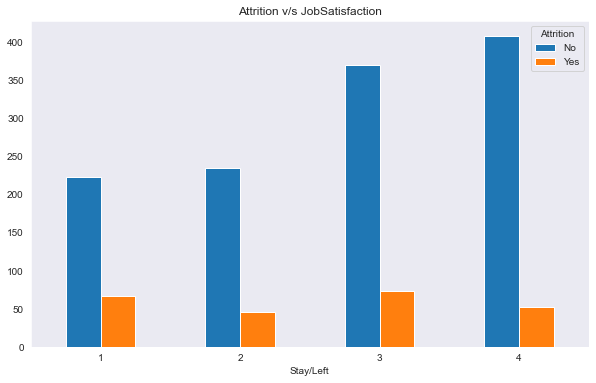

In [23]:
# Gettinng the crosstab for attrition v/s satisfaction
pd.crosstab(dataset['JobSatisfaction'],dataset['Attrition']).plot(kind='bar',figsize=(10,6))
plt.title('Attrition v/s JobSatisfaction')
plt.xlabel('Stay/Left')
plt.xticks(rotation=0)  

In [24]:
# In the dataset, JobLevel is given for every employee working on their respective joblevel such as '1', '2', etc.
jobslevel_dict = dataset['JobLevel'].value_counts()
print(jobslevel_dict)

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

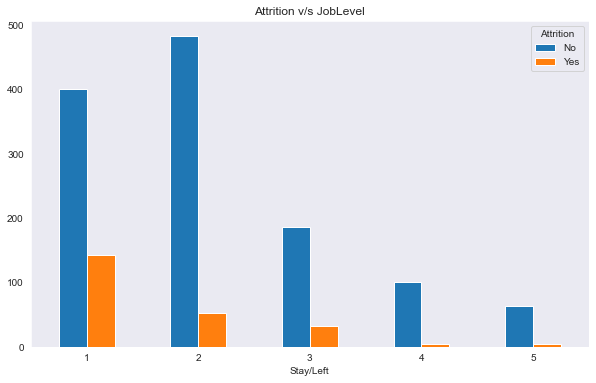

In [25]:
pd.crosstab(dataset['JobLevel'],dataset['Attrition']).plot(kind='bar',figsize=(10,6))
plt.title('Attrition v/s JobLevel')
plt.xlabel('Stay/Left')
plt.xticks(rotation=0) 

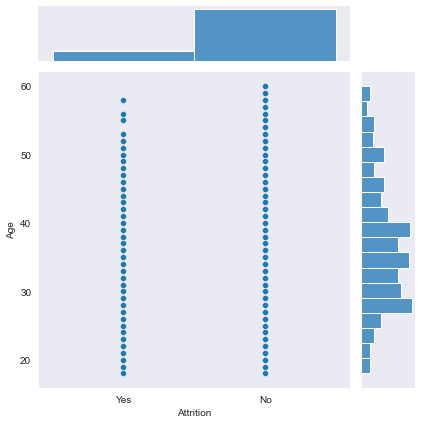

In [26]:
# Here are some of the integer value features contributing to the attrition of employees
sns.jointplot(x='Attrition', y='Age', data=dataset)

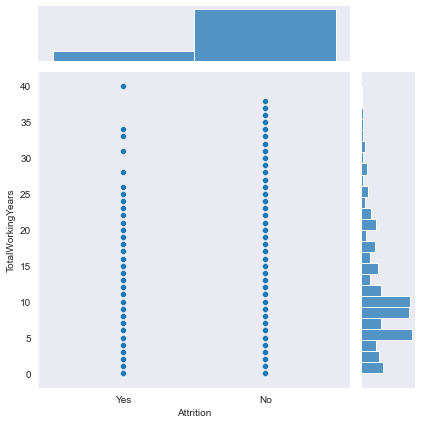

In [27]:
# Total working years is the features which contains years the employee has been working
sns.jointplot(x='Attrition', y='TotalWorkingYears', data=dataset)

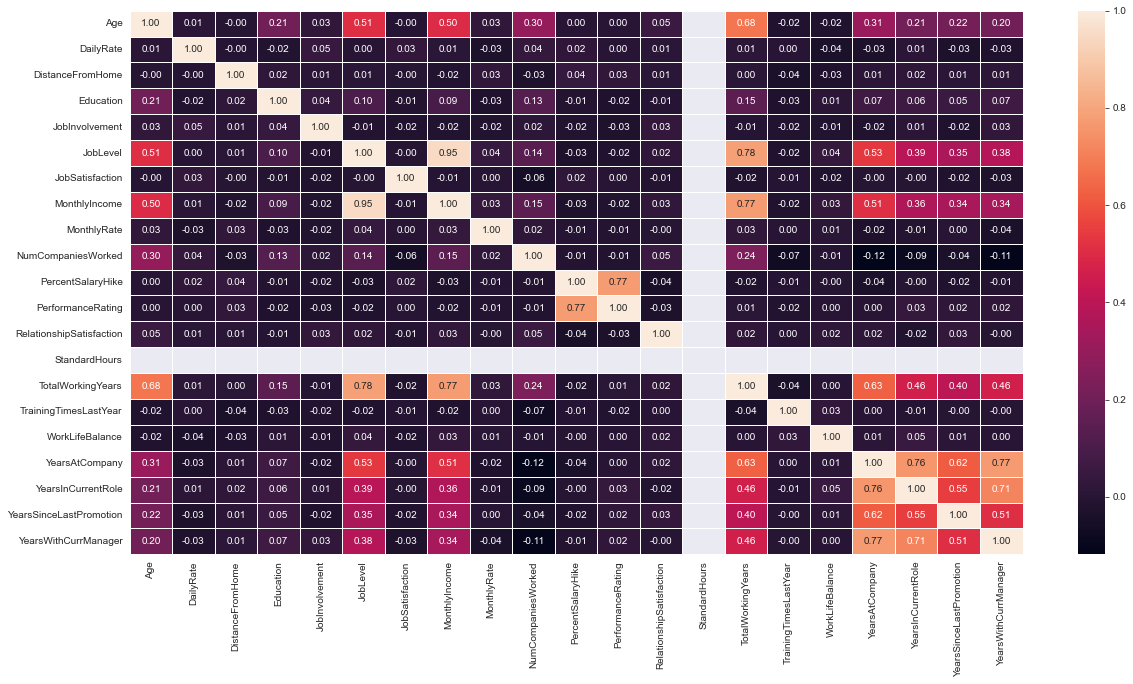

In [28]:
# This is the correlation matrix for the dataset
corr_matrix=dataset.corr()
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f")

In [29]:
# Dropping the unwanted features from dataset
dataset = dataset.drop(['DailyRate','DistanceFromHome', 'Education', 'EducationField', 'JobInvolvement', 'JobLevel', 
                       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
                       'YearsInCurrentRole', 'YearsWithCurrManager', 'MonthlyRate', 'StandardHours'], axis='columns')
dataset.head()

,Age,Attrition,BusinessTravel,Department,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,TotalWorkingYears,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,Female,Sales Executive,4,Single,5993,8,0
1,49,No,Travel_Frequently,Research & Development,Male,Research Scientist,2,Married,5130,10,1
2,37,Yes,Travel_Rarely,Research & Development,Male,Laboratory Technician,3,Single,2090,7,0
3,33,No,Travel_Frequently,Research & Development,Female,Research Scientist,3,Married,2909,8,3
4,27,No,Travel_Rarely,Research & Development,Male,Laboratory Technician,2,Married,3468,6,2


In [30]:
# Changing all the categorical features to numerical values for training of model
business = pd.get_dummies(dataset.BusinessTravel)
dataset = pd.concat([dataset, business], axis='columns')

In [31]:
department = pd.get_dummies(dataset.Department)
dataset = pd.concat([dataset, department], axis='columns')

In [32]:
gender = pd.get_dummies(dataset.Gender)
dataset = pd.concat([dataset, gender], axis='columns')

In [33]:
jobrole = pd.get_dummies(dataset.JobRole)
dataset = pd.concat([dataset, jobrole], axis='columns')

In [34]:
marital = pd.get_dummies(dataset.MaritalStatus)
dataset = pd.concat([dataset, marital], axis='columns')

In [35]:
dataset = dataset.drop(['BusinessTravel','Department','Gender','JobRole','MaritalStatus'], axis='columns')
dataset.head()

,Age,Attrition,JobSatisfaction,MonthlyIncome,TotalWorkingYears,YearsSinceLastPromotion,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,Yes,4,5993,8,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,49,No,2,5130,10,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,37,Yes,3,2090,7,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33,No,3,2909,8,3,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,27,No,2,3468,6,2,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [36]:
Y = dataset['Attrition']
X = dataset.drop('Attrition', axis='columns')

In [37]:
# Splitting the datasets into training and testing of datasets 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=20)

In [38]:
# Saving the updated training dataset to local directory
X.to_csv(os.path.join('Dataset/','updated-Employee-Attrition.csv'))

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [40]:
# Initializing the algorithms 
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gnb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=3)

In [41]:
# Applying the 5 algorithms
for a,b in zip([lr,dt,knn,rf,gnb],["Logistic Regression","Decision Tree","KNN","Random Forest","Naive Bayes"]):
    a.fit(X_train,Y_train)
    prediction=a.predict(X_train)
    Y_pred=a.predict(X_test)
    score1=accuracy_score(Y_train,prediction)
    score=accuracy_score(Y_test,Y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.843537
[Logistic Regression] test data accuracy is : 0.836735
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.775510
[KNN] training data accuracy is : 0.864796
[KNN] test data accuracy is : 0.789116
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.833333
[Naive Bayes] training data accuracy is : 0.670068
[Naive Bayes] test data accuracy is : 0.714286


In [42]:
# Getting the scores for each algorithms
# Logistic Regression gives the best accuracy for testing
model_scores = {'Logistic Regression':lr.score(X_test,Y_test),
                'KNN classifier':knn.score(X_test,Y_test),
                'Random forest':rf.score(X_test,Y_test),
                'Decision tree':dt.score(X_test,Y_test),
                'Naive Bayes':gnb.score(X_test,Y_test) }
model_scores

{'Logistic Regression': 0.8367346938775511,
 'KNN classifier': 0.7891156462585034,
 'Random forest': 0.8333333333333334,
 'Decision tree': 0.7755102040816326,
 'Naive Bayes': 0.7142857142857143}

In [43]:
# Here is the classification report for logistic regression
from sklearn.metrics import classification_report

rf_Y_preds = rf.predict(X_test)
print(classification_report(Y_test,rf_Y_preds))

              precision    recall  f1-score   support

          No       0.85      0.97      0.91       243
         Yes       0.56      0.18      0.27        51

    accuracy                           0.83       294
   macro avg       0.71      0.57      0.59       294
weighted avg       0.80      0.83      0.80       294



In [44]:
# This is the classification report for random forest classifier
from sklearn.metrics import classification_report

lr_Y_preds = lr.predict(X_test)
print(classification_report(Y_test,lr_Y_preds))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91       243
         Yes       1.00      0.06      0.11        51

    accuracy                           0.84       294
   macro avg       0.92      0.53      0.51       294
weighted avg       0.86      0.84      0.77       294



In [45]:
# COmparing all the models
model_compare = pd.DataFrame(model_scores,index = ['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Random forest,Decision tree,Naive Bayes
accuracy,0.836735,0.789116,0.833333,0.77551,0.714286


<AxesSubplot:>

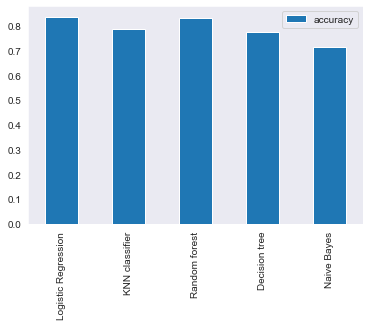

In [46]:
model_compare.T.plot(kind='bar')

In [47]:
# Here feature importance or feature influence on Attrition of every feature in the dataset is given
feature_dict = dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

{'Age': -0.008872908768971526,
 'Attrition': -0.24014036111666856,
 'JobSatisfaction': -8.966603774039006e-05,
 'MonthlyIncome': -0.042391829921201905,
 'TotalWorkingYears': 0.09975790964158067,
 'YearsSinceLastPromotion': -0.14219206227583697,
 'Non-Travel': 0.26622408039819667,
 'Travel_Frequently': -0.12179797187985918,
 'Travel_Rarely': -0.00940155873485879,
 'Human Resources': 0.12305830933598445,
 'Research & Development': 0.22796251167994508,
 'Sales': -0.07999836859535453,
 'Female': 0.08223241483785354,
 'Male': -0.144126380836017,
 'Healthcare Representative': -0.00358325297169864,
 'Laboratory Technician': -0.017739378729867215,
 'Manager': -0.09943221824396953,
 'Manufacturing Director': -0.02131343674250269,
 'Research Director': -0.07129045811023603,
 'Research Scientist': 0.12760894235862585,
 'Sales Executive': 0.10905192018218052,
 'Sales Representative': -0.2215914507298526,
 'Divorced': -0.19853385690170688,
 'Married': 0.42235935387406054}

<AxesSubplot:title={'center':'Feature Importance'}>

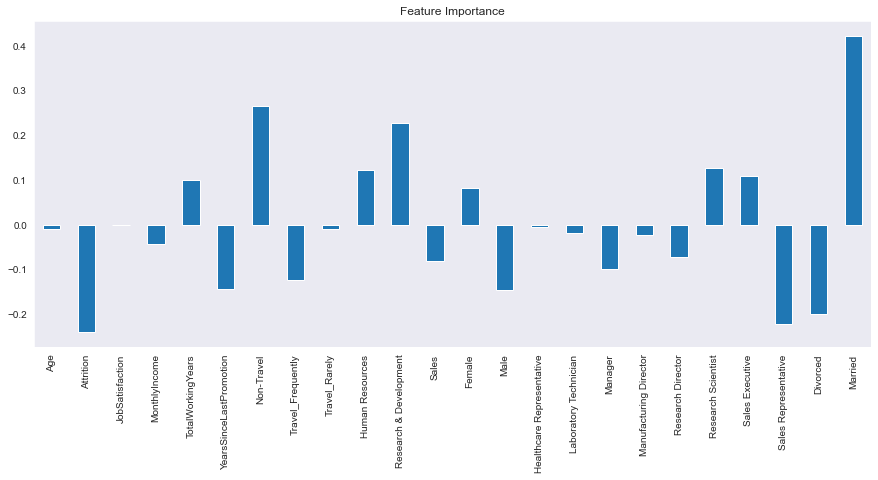

In [48]:
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot(kind = "bar",legend=False,title = "Feature Importance",figsize = (15,6))

In [49]:
# Making the prediction on whole dataset
import pickle

saved_model = pickle.dumps(lr)
lr_from_pickle = pickle.loads(saved_model)
lr_from_pickle.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [50]:
# Making a function for predicting output of 1 instance 
def prediction(age, jobSatisfaction, monthlyIncome, totalWorkingYears, 
               yearsSinceLastPromotion, businessTravel, department, gender, 
               jobRole, maritalStatus):
    
    bt_i, d_i, g_i, jr_i, ms_i = -1,-1,-1,-1,-1
        
    if businessTravel != None:
        bt_i = np.where(X.columns == businessTravel)[0][0]
    
    if department != None:
        d_i = np.where(X.columns == department)[0][0]
        
    if gender != None:        
        g_i = np.where(X.columns == gender)[0][0]
        
    if jobRole != None:        
        jr_i = np.where(X.columns == jobRole)[0][0]

    if maritalStatus != None:        
        ms_i = np.where(X.columns == maritalStatus)[0][0]
            
    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = jobSatisfaction
    x[2] = monthlyIncome
    x[3] = totalWorkingYears
    x[4] = yearsSinceLastPromotion

    if bt_i >= 0:
        x[bt_i] = 1
    if d_i >= 0:
        x[d_i] = 1
    if g_i >= 0:
        x[g_i] = 1
    if jr_i >= 0:
        x[jr_i] = 1
    if ms_i >= 0:
        x[ms_i] = 1
        
    return lr.predict([x])[0]

In [51]:
pred = prediction(57, 2, 3000, 8, 5, 'Travel_Frequently', 'Research & Development', 'Male', 'Laboratory Technician', 'Single')
print("Prediction = " + pred)

Prediction = No


In [52]:
# Saving the pickle file of model to local directory
filename = 'final_model.pkl'
pickle.dump(lr, open(filename, 'wb'))